#Descarregamento dos dados do ficheiro CVS_cleaned

In [1]:
import pandas as pd
import numpy as np

# Ler o arquivo CSV
df = pd.read_csv('CVD_cleaned.csv')

#Remoção de 10% e 20% dos dados

In [ ]:
def remover_dados(df,percentual_remocao):

  # Substituir 10% dos valores de cada linha por NaN
  for index, row in df.iterrows():
    # Selecionar colunas aleatórias na linha
    num_colunas = len(row)
    colunas_a_remover = np.random.choice(row.index, size=round(num_colunas * percentual_remocao), replace=False)
    # Substituir os valores escolhidos por NaN
    df.loc[index, colunas_a_remover] = np.nan
  return df

numero_registos = 10
df_copia = df.sample(n=numero_registos, random_state=42)
#print(df_copia.iloc[2])

df_delete_dez = remover_dados(df_copia,0.1)
df_delete_vinte = remover_dados(df_copia,0.2)

# Tratamento dos dados eliminados

## Para 10% dos dados (Valor mais comum e Valor medio)



In [ ]:
# Copiar do dataset dos dados eliminados para outro dataset

#Filtração do dataset para conter só os registos que contém pelo menos um nan

#linhas_com_nulos = df_delete_dez[df_delete_dez.isnull().any(axis=1)]
#print(linhas_com_nulos)
#df_delete_dez_comum = linhas_com_nulos
#df_delete_dez_mean = linhas_com_nulos

df_delete_dez_comum = df_delete_dez
df_delete_dez_mean = df_delete_dez

# Tratamento dos dados eliminados através da substituição pelo valor mais comum
for coluna_comum in df_delete_dez_comum.columns:
    valor_mais_comum = df_delete_dez_mean[coluna_comum].mode()[0]  # Calcula o valor mais comum
    df_delete_dez_comum[coluna_comum] = df_delete_dez_comum[coluna_comum].fillna(valor_mais_comum)  # Substitui valores nulos


# Tratamento dos dados eliminados através da substituição pelo valor médio

# É realizado uma conversão das colunas quantativas para numericos, para obter o valor médio dessas colunas

# Identificar colunas qualitativas
categorical_cols = df_delete_dez_mean.select_dtypes(include=['object', 'category']).columns

# Criação de um dicionário para mapear categorias para valores numéricos e vice-versa
categorical_maps = {}

# Converter os valores categoricos para valores numéricos
for col in categorical_cols:
    unique_categories = df_delete_dez_mean[col].dropna().unique()
    category_to_num = {cat: num for num, cat in enumerate(unique_categories)}
    num_to_category = {num: cat for cat, num in category_to_num.items()}
    categorical_maps[col] = {'cat_to_num': category_to_num, 'num_to_cat': num_to_category}
    df_delete_dez_mean[col] = df_delete_dez_mean[col].map(category_to_num)

# Passo 3: Obter o valor médio para cada coluna
means = {}
for col in df_delete_dez_mean.columns:
    means[col] = df_delete_dez_mean[col].mean()

# Passo 4: Substituir valores nulos pelo valor médio
for col in df_delete_dez_mean.columns:
    df_delete_dez_mean[col] = df_delete_dez_mean[col].fillna(means[col])

# Passo 5: Reversão das colunas qualitativas de valores numéricos para as categorias originais
for col in categorical_cols:
    df_delete_dez_mean[col] = df_delete_dez_mean[col].round().astype(int).map(categorical_maps[col]['num_to_cat'])

print(df_delete_dez_comum)
print(df_delete_dez_mean)

       General_Health                  Checkup Exercise Heart_Disease  \
302051      Excellent     Within the past year      Yes            No   
59950       Very Good     Within the past year       No            No   
203639           Good     Within the past year       No            No   
78768       Very Good     Within the past year      Yes            No   
216156      Excellent     Within the past year      Yes            No   
84107       Excellent     Within the past year      Yes            No   
284341      Excellent     Within the past year      Yes            No   
227575      Very Good     Within the past year      Yes            No   
19010            Good  Within the past 2 years      Yes            No   
123471      Excellent  Within the past 5 years      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
302051          No           No         No   
59950           No           No         No   
203639          No           No         No   
78768       

## Para 20% dos dados (Valor mais comum e Valor medio)

In [ ]:
# Copiar do dataset dos dados eliminados para outro dataset

#Filtração do dataset para conter só os registos que contém pelo menos um nan

#linhas_com_nulos = df_delete_vinte[df_delete_vinte.isnull().any(axis=1)]
#print(linhas_com_nulos)
#df_delete_vinte_comum = linhas_com_nulos
#df_delete_vinte_mean = linhas_com_nulos

df_delete_vinte_comum = df_delete_vinte
df_delete_vinte_mean = df_delete_vinte

# Tratamento dos dados eliminados através da substituição pelo valor mais comum
for coluna_comum in df_delete_vinte_comum.columns:
    valor_mais_comum = df_delete_vinte_comum[coluna_comum].mode()[0]  # Calcula o valor mais comum
    df_delete_vinte_comum[coluna_comum] = df_delete_vinte_comum[coluna_comum].fillna(valor_mais_comum)  # Substitui valores nulos

# Tratamento dos dados eliminados através da substituição pelo valor médio

# Identificar colunas qualitativas
categorical_cols = df_delete_vinte_mean.select_dtypes(include=['object', 'category']).columns

# Criação de um dicionário para mapear categorias para valores numéricos e vice-versa
categorical_maps = {}

# Converter valores categoricos para valores numéricos
for col in categorical_cols:
    unique_categories = df_delete_vinte_mean[col].dropna().unique()
    category_to_num = {cat: num for num, cat in enumerate(unique_categories)}
    num_to_category = {num: cat for cat, num in category_to_num.items()}
    categorical_maps[col] = {'cat_to_num': category_to_num, 'num_to_cat': num_to_category}
    df_delete_vinte_mean[col] = df_delete_vinte_mean[col].map(category_to_num)

# Passo 3: Obter o valor médio para cada coluna
means = {}
for col in df_delete_vinte_mean.columns:
    means[col] = df_delete_vinte_mean[col].mean()

# Passo 4: Substituir valores nulos pelo valor médio
for col in df_delete_vinte_mean.columns:
    df_delete_vinte_mean[col] = df_delete_vinte_mean[col].fillna(means[col])

# Passo 5: Reverter colunas qualitativas de valores numéricos para categorias originais
for col in categorical_cols:
    df_delete_vinte_mean[col] = df_delete_vinte_mean[col].round().astype(int).map(categorical_maps[col]['num_to_cat'])

print(df_delete_vinte_comum)
print(df_delete_vinte_mean)

       General_Health                  Checkup Exercise Heart_Disease  \
302051      Excellent     Within the past year      Yes            No   
59950       Very Good     Within the past year       No            No   
203639           Good     Within the past year       No            No   
78768       Very Good     Within the past year      Yes            No   
216156      Excellent     Within the past year      Yes            No   
84107       Excellent     Within the past year      Yes            No   
284341      Excellent     Within the past year      Yes            No   
227575      Very Good     Within the past year      Yes            No   
19010            Good  Within the past 2 years      Yes            No   
123471      Excellent  Within the past 5 years      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
302051          No           No         No   
59950           No           No         No   
203639          No           No         No   
78768       

#Normalização dos dados

In [ ]:
def min_max_normalization(df, columns):
    for column in columns:
        min_val = df[column].min()
        max_val = df[column].max()
        df[column] = (df[column] - min_val) / (max_val - min_val)
    return df

def z_score_normalization(df, columns):
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df[column] = (df[column] - mean) / std
    return df



##Min-Max

Para a normalização dos dados, foi feito nas colunas "Height_(cm)' de cm para m, "Fruit_Consumption" para [0,1], "Green_Vegetables_Consumption" para [0,1] e "FriedPotato_Consumption" para [0,1]

Nota: Existe um gama de valores que representa mellhor os valores de consumo?

In [ ]:
df_min_max = df.copy()

#Valido?
for column in ['Height_(cm)']:
  df_min_max[column] = df_min_max[column]/100

df_min_max = min_max_normalization(df_min_max, ['Fruit_Consumption'])
df_min_max = min_max_normalization(df_min_max, ['Green_Vegetables_Consumption'])
df_min_max = min_max_normalization(df_min_max, ['FriedPotato_Consumption'])

df_min_max.rename(columns={'Height_(cm)': 'Height_(m)'}, inplace=True)
df_min_max.rename(columns={'Fruit_Consumption': 'Fruit_Consumption [0,1]'}, inplace=True)
df_min_max.rename(columns={'Green_Vegetables_Consumption': 'Green_Vegetables_Consumption [0,1]'}, inplace=True)
df_min_max.rename(columns={'FriedPotato_Consumption': 'FriedPotato_Consumption [0,1]'}, inplace=True)

print(df_min_max)

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

##Z-score

Para a normalização dos dados, foi feito nas colunas "Fruit_Consumption", "Green_Vegetables_Consumption" e "FriedPotato_Consumption"

In [ ]:
df_z_score = df.copy()

df_z_score = z_score_normalization(df_z_score, ['Fruit_Consumption'])
df_z_score = z_score_normalization(df_z_score, ['Green_Vegetables_Consumption'])
df_z_score = z_score_normalization(df_z_score, ['FriedPotato_Consumption'])

df_z_score.rename(columns={'Fruit_Consumption': 'Fruit_Consumption [0,1]'}, inplace=True)
df_z_score.rename(columns={'Green_Vegetables_Consumption': 'Green_Vegetables_Consumption [0,1]'}, inplace=True)
df_z_score.rename(columns={'FriedPotato_Consumption': 'FriedPotato_Consumption [0,1]'}, inplace=True)

print(df_z_score)

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   
1               No           No

#Discritização dos dados

Para a discritização dos dados foi escolhida as colunas relativamente ao BMI, Fruit_Consumption, Green_Vegetables_Consumption e FriedPotato_Consumption

Para os valores discretos em cada coluna são:

BMI:

Menor que 18,5 -> Magreza

18,5 a 24,9	-> Normal

25 a 29,9	-> Sobrepeso

30 a 34,9	-> Obesidade grau I

35 a 39,9	-> Obesidade grau II

Maior que 40 -> Obesidade grau III

Fruit_Consumption, Green_Vegetables_Consumption e FriedPotato_Consumption:

Menor que 25 -> Muito Pouco

25 a 49,9 -> Pouco

50 a 74,9 -> Bom

75 a 99,9 -> Muito

Maior que 100 -> Excesso


In [ ]:
df_discretization = df.copy()
bmi_labels = ["Magreza","Normal","Sobrepeso","Obesidade grau I","Obesidade grau II","Obesidade grau III"]
consummtion_labels = ["Muito Pouco","Pouco","Bom","Muito","Excesso"]

## Equal-Width binning

In [ ]:
# Classes de BMI para Equal-Width Binning
df_discretization["BMI_Equal_Width"]  = pd.cut(df_discretization["BMI"],bins=[-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf],labels=bmi_labels,right=True)

df_discretization["Fruit_Consumption_Equal_Width"] = pd.cut(df_discretization["Fruit_Consumption"],bins=[-np.inf, 25.0, 49.9, 74.9, 99.9, np.inf],labels=consummtion_labels,right=True)
df_discretization["Green_Vegetables_Consumption_Equal_Width"]  = pd.cut(df_discretization["Green_Vegetables_Consumption"],bins=[-np.inf, 25.0, 49.9, 74.9, 99.9,np.inf],labels=consummtion_labels,right=True)
df_discretization["FriedPotato_Consumption_Equal_Width"]  = pd.cut(df_discretization["FriedPotato_Consumption"],bins=[-np.inf, 25.0, 49.9, 74.9, 99.9, np.inf],labels=consummtion_labels,right=True)

print(df_discretization[['BMI', 'BMI_Equal_Width']])
print(df_discretization[['Fruit_Consumption', 'Fruit_Consumption_Equal_Width']])
print(df_discretization[['Green_Vegetables_Consumption', 'Green_Vegetables_Consumption_Equal_Width']])
print(df_discretization[['FriedPotato_Consumption','FriedPotato_Consumption_Equal_Width']])


          BMI   BMI_Equal_Width
0       14.54           Magreza
1       28.29         Sobrepeso
2       33.47  Obesidade grau I
3       28.73         Sobrepeso
4       24.37            Normal
...       ...               ...
308849  29.05         Sobrepeso
308850  21.48            Normal
308851  24.69            Normal
308852  23.73            Normal
308853  31.71  Obesidade grau I

[308854 rows x 2 columns]
        Fruit_Consumption Fruit_Consumption_Equal_Width
0                    30.0                         Pouco
1                    30.0                         Pouco
2                    12.0                   Muito Pouco
3                    30.0                         Pouco
4                     8.0                   Muito Pouco
...                   ...                           ...
308849               30.0                         Pouco
308850               15.0                   Muito Pouco
308851               40.0                         Pouco
308852               30.0    

## Equal-Height binning

In [ ]:
print(df_discretization['Fruit_Consumption'].unique())
print(df_discretization['Green_Vegetables_Consumption'].unique())
print(df_discretization['FriedPotato_Consumption'].unique())

In [ ]:
# Classes de BMI para Equal-Height Binning
df_discretization["BMI_Equal_Height"] = pd.qcut(df_discretization["BMI"], q=len(bmi_labels), labels=bmi_labels)

df_discretization["Fruit_Consumption_Equal_Height"] = pd.qcut(df_discretization["Fruit_Consumption"], q=len(consummtion_labels), labels=consummtion_labels)
df_discretization["Green_Vegetables_Consumption_Equal_Height"] = pd.qcut(df_discretization["Green_Vegetables_Consumption"], q=len(consummtion_labels), labels=consummtion_labels)
df_discretization["FriedPotato_Consumption_Equal_Height"] = pd.qcut(df_discretization["FriedPotato_Consumption"], q=len(consummtion_labels), labels=consummtion_labels)

print(df_discretization[['BMI', 'BMI_Equal_Height']])
print(df_discretization[['Fruit_Consumption', 'Fruit_Consumption_Equal_Height']])
print(df_discretization[['Green_Vegetables_Consumption', 'Green_Vegetables_Consumption_Equal_Height']])

print(df_discretization[['FriedPotato_Consumption']])
print(df_discretization[['FriedPotato_Consumption_Equal_Height']])


          BMI   BMI_Equal_Height
0       14.54            Magreza
1       28.29   Obesidade grau I
2       33.47  Obesidade grau II
3       28.73   Obesidade grau I
4       24.37             Normal
...       ...                ...
308849  29.05   Obesidade grau I
308850  21.48            Magreza
308851  24.69             Normal
308852  23.73             Normal
308853  31.71  Obesidade grau II

[308854 rows x 2 columns]
        Fruit_Consumption Fruit_Consumption_Equal_Height
0                    30.0                            Bom
1                    30.0                            Bom
2                    12.0                          Pouco
3                    30.0                            Bom
4                     8.0                    Muito Pouco
...                   ...                            ...
308849               30.0                            Bom
308850               15.0                          Pouco
308851               40.0                          Muito
308852 

#Redução dos dados

In [ ]:
nomes_colunas = df.columns.tolist()
print(nomes_colunas)

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


## Attribute Sampling

Colunas retiradas -> Skin_Cancer, Other_Cancer, Depression e Arthritis

In [ ]:
df_Reduction_attribute_sampling = df[[
    'General_Health',
    'Checkup',
    'Exercise',
    'Heart_Disease',
    'Diabetes',
    'Sex',
    'Age_Category',
    'Height_(cm)',
    'Weight_(kg)',
    'BMI',
    'Smoking_History',
    'Alcohol_Consumption',
    'Fruit_Consumption',
    'Green_Vegetables_Consumption',
    'FriedPotato_Consumption'
    ]]
print(df_Reduction_attribute_sampling)

       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

                                          Diabetes     Sex Age_Category  \
0                                               

In [ ]:
print(df_Reduction_attribute_sampling.columns.tolist())

['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Diabetes', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


## Aggregation

In [ ]:
#Colunas a juntar
#Skin_Cancer, Other Cancer -> Have Cancer
#Fruit_Consumption, Green_Vegetables_Consumption -> Alimentação Saudavel Consumo
#Metodo de agregação para Consumo de alimentação Saudavel?

In [ ]:
df_Reduction_aggregation = df.copy()

print(df_Reduction_aggregation['Skin_Cancer'].unique())
print(df_Reduction_aggregation['Other_Cancer'].unique())

#Criação de uma nova colunas, chamada 'Have_Cancer' que será o resultado a combinação das colunas 'Skin_Cancer' e 'Other_Cancer'

df_Reduction_aggregation['Have_Cancer'] = df_Reduction_aggregation.apply(
    lambda row: 'yes' if row['Skin_Cancer'] == 'Yes' or row['Other_Cancer'] == 'Yes' else 'no', axis=1
)
df_Reduction_aggregation = df_Reduction_aggregation.drop(['Skin_Cancer', 'Other_Cancer'], axis=1)

print(df_Reduction_aggregation['Have_Cancer'])
print(df_Reduction_aggregation['Have_Cancer'].unique())
print(df_Reduction_aggregation)

['No' 'Yes']
['No' 'Yes']
0         no
1         no
2         no
3         no
4         no
          ..
308849    no
308850    no
308851    no
308852    no
308853    no
Name: Have_Cancer, Length: 308854, dtype: object
['no' 'yes']
       General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the pa

#Supervised Learning Algorithms

## Arvores de decisão

In [25]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding categorical features

df_decision_tree = df[:10000].copy()

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate through all columns and encode categorical features
for column in df_decision_tree.select_dtypes(include=['object']).columns:
    df_decision_tree[column] = encoder.fit_transform(df_decision_tree[column])

# Define features (X) and target variable (y) correctly
X = df_decision_tree.drop(['Heart_Disease'], axis=1)  # Features
y = df_decision_tree['Heart_Disease']  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Precisão:", metrics.accuracy_score(y_test, y_pred))

Precisão: 0.8356666666666667


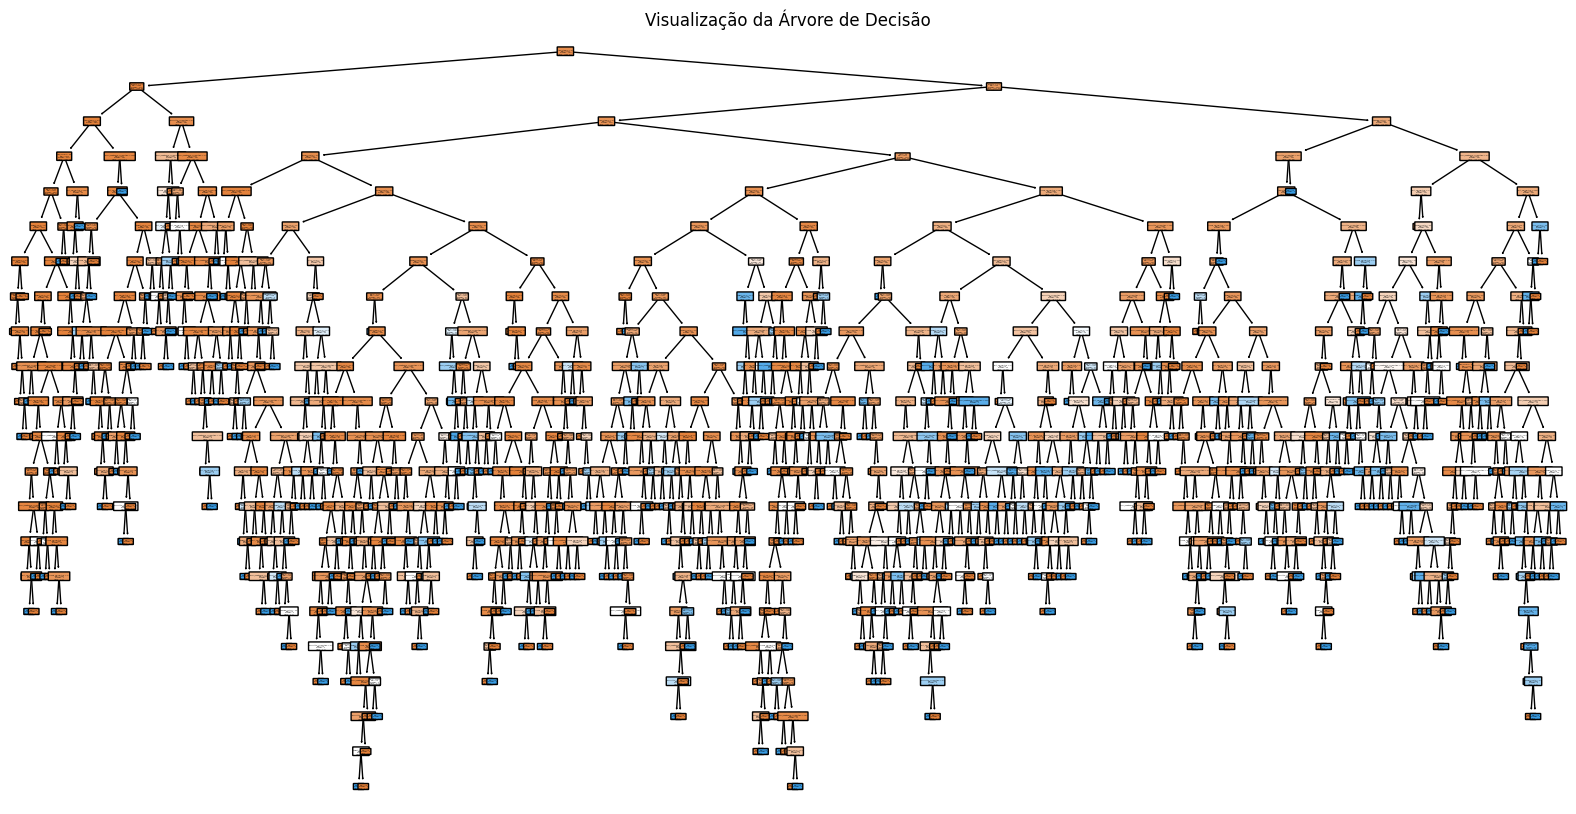

In [26]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Get original class names before encoding
original_class_names = df_decision_tree['Heart_Disease'].unique().astype(str)

# Visualize the trained decision tree
plt.figure(figsize=(20, 10))  # Define o tamanho do gráfico
plot_tree(clf, filled=True, feature_names=X.columns,
          class_names=original_class_names, rounded=True)  # Use original class names here
plt.title("Visualização da Árvore de Decisão")
plt.show()

## Percepção de multi camada

## K-NN

#Unsupervised learning algorithms

## k-means

In [ ]:

unique_values = df.apply(lambda x: x.unique())
print(unique_values)

General_Health                           [Poor, Very Good, Good, Fair, Excellent]
Checkup                         [Within the past 2 years, Within the past year...
Exercise                                                                [No, Yes]
Heart_Disease                                                           [No, Yes]
Skin_Cancer                                                             [No, Yes]
Other_Cancer                                                            [No, Yes]
Depression                                                              [No, Yes]
Diabetes                        [No, Yes, No, pre-diabetes or borderline diabe...
Arthritis                                                               [Yes, No]
Sex                                                                [Female, Male]
Age_Category                    [70-74, 60-64, 75-79, 80+, 65-69, 50-54, 45-49...
Height_(cm)                     [150.0, 165.0, 163.0, 180.0, 191.0, 183.0, 175...
Weight_(kg)     

In [ ]:
print(df['BMI'].unique())

[14.54 28.29 33.47 ... 63.83 19.09 56.32]


In [ ]:
df_k_means = df.copy()

#Conversão de valor catogoricos para numericos
df_k_means['General_Health'] = df_k_means['General_Health'].map({'Excellent': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0})
df_k_means['Checkup'] = df_k_means['Checkup'].map({'Within the past year': 4, 'Within the past 2 years': 3, 'Within the past 5 years': 2, '5 or more years ago':1, 'Never':0 })
df_k_means['Exercise'] = df_k_means['Exercise'].map({'Yes': 1, 'No': 0})
df_k_means['Heart_Disease'] = df_k_means['Heart_Disease'].map({'Yes': 1, 'No': 0}) #Necessario?
df_k_means['Skin_Cancer'] = df_k_means['Skin_Cancer'].map({'Yes': 1, 'No': 0})
df_k_means['Other_Cancer'] = df_k_means['Other_Cancer'].map({'Yes': 1, 'No': 0})
df_k_means['Diabetes'] = df_k_means['Diabetes'].map({'Yes': 3, 'Yes, but female told only during pregnancy':2, 'No, pre-diabetes or borderline diabetes':1, 'No': 0})
df_k_means['Depression'] = df_k_means['Depression'].map({'Yes': 1, 'No': 0})
df_k_means['Arthritis'] = df_k_means['Arthritis'].map({'Yes': 1, 'No': 0})
df_k_means['Sex'] = df_k_means['Sex'].map({'Female': 0, 'Male': 1})
df_k_means['Age_Category'] = df_k_means['Age_Category'].map({'18-24': 0, '25-29': 1, '30-34':2, '35-39':3, '40-44':4, '45-49':5, '50-54':6, '55-59':7, '60-64':8, '65-69':9, '70-74':10, '75-79':11, '80+':12 })

for column in ['Height_(cm)']:
  df_k_means[column] = df_k_means[column]/100 #Necessario?

df_k_means['Smoking_History'] = df_k_means['Smoking_History'].map({'Yes': 1, 'No': 0})

unique_values = df_k_means.apply(lambda x: x.unique())
print(unique_values)

General_Health                                                    [0, 3, 2, 1, 4]
Checkup                                                           [3, 4, 1, 2, 0]
Exercise                                                                   [0, 1]
Heart_Disease                                                              [0, 1]
Skin_Cancer                                                                [0, 1]
Other_Cancer                                                               [0, 1]
Depression                                                                 [0, 1]
Diabetes                                                             [0, 3, 1, 2]
Arthritis                                                                  [1, 0]
Sex                                                                        [0, 1]
Age_Category                           [10, 8, 11, 12, 9, 6, 5, 0, 2, 7, 3, 4, 1]
Height_(cm)                     [1.5, 1.65, 1.63, 1.8, 1.91, 1.83, 1.75, 1.6, ...
Weight_(kg)     

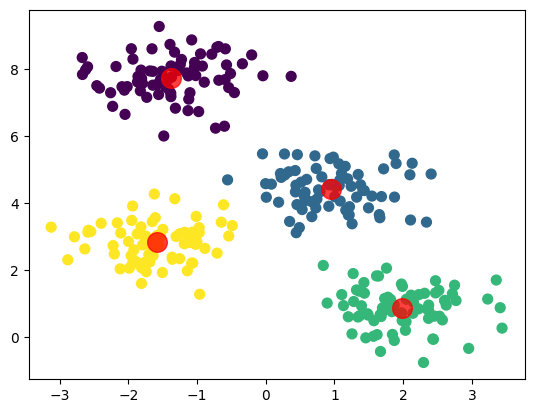

NameError: name 'inertias' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
#Step 2: Generate Synthetic Data

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
#Step 3: Apply K-Means Clustering

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
#Step 4: Visualize the Clusters

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## DBScan